# CIRCAI  
## waste classification

### Transfer Learning Using VGG16

In [1]:
#import numpy for number array handling and represent rgb image pixel
import numpy as np

In [2]:
#import tesnsorflow to use any tools need for deep learning
import tensorflow as tf

In [3]:
#import keras api needed to implement deep learning techniques
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#import libraries for visualization of dat
import matplotlib.pyplot as plt

#Allow charts and graphics to display right below the page of the browser
%matplotlib inline

In [5]:
#Loading data
#paths to the train, validation and test image datasets 
train_path = 'dataset_garbage'
valid_path = 'dataset_garbage'

#base_path = 'dataset_garbage'

### Split images along with applying Data processing and Data Augmentation

In [6]:
# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')


Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


# Visualization of the images after preprocessing

In [7]:
# plot images after applying VGG16 data preprocessing method
def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

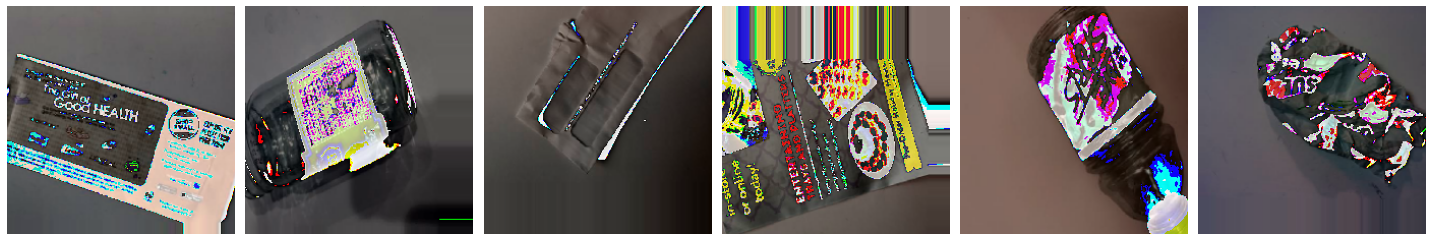

In [8]:
imgs, labels = next(train_batches)
plotImages(imgs)

# Building CNN Architecture

In [9]:
# set the input image size for proposed CNN model
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# import the convolution base of the VGG16 model with pre-trained weights
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')

# Summary of convolution base of VGG16 model


In [10]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Initialize a Sequential model to group a linear stack of layers

In [11]:
model = Sequential()

## Freeze the convolution base of VGG16 to prevent weights being updated, during the training inorder to extract features

In [12]:
base_model.trainable= False

In [13]:
# add VGG16 convolution base to initialize sequential model
model.add(base_model)

In [14]:

# add global average pooling layer
model.add(GlobalAveragePooling2D())

In [15]:
# add densely-connected NN layer with 512 hidden units
model.add(Dense(units=512, activation='relu'))  # use ReLU activation function
model.add(BatchNormalization())                 # normalize and scale inputs or activations
model.add(Dropout(0.2))                         # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 128 hidden units
model.add(Dense(units=128, activation='relu')) # use ReLU activation function
model.add(BatchNormalization())                # normalize and scale inputs or activations
model.add(Dropout(0.2))                        # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 6 hidden units
model.add(Dense(units=6, activation='softmax')) # use Softmax activation function to do final predictions

# Summary of proposed CNN model(architecture)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

# Compile the Built CNN Model

In [17]:
# compile the built CNN model by selecting suitable optimizer and loss function
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model

In [18]:
# train the model with appropriate number of epochs
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs= 10, verbose=2)

Epoch 1/10
143/143 - 857s - loss: 1.6838 - accuracy: 0.3976 - val_loss: 0.9985 - val_accuracy: 0.6733
Epoch 2/10
143/143 - 531s - loss: 1.0289 - accuracy: 0.6366 - val_loss: 0.8012 - val_accuracy: 0.7211
Epoch 3/10
143/143 - 577s - loss: 0.7931 - accuracy: 0.7140 - val_loss: 0.6987 - val_accuracy: 0.7649
Epoch 4/10
143/143 - 585s - loss: 0.7517 - accuracy: 0.7337 - val_loss: 0.6372 - val_accuracy: 0.7689
Epoch 5/10
143/143 - 535s - loss: 0.6567 - accuracy: 0.7654 - val_loss: 0.5555 - val_accuracy: 0.8088
Epoch 6/10
143/143 - 531s - loss: 0.6199 - accuracy: 0.7715 - val_loss: 0.5208 - val_accuracy: 0.7968
Epoch 7/10
143/143 - 535s - loss: 0.5530 - accuracy: 0.8076 - val_loss: 0.4910 - val_accuracy: 0.8127
Epoch 8/10
143/143 - 533s - loss: 0.5309 - accuracy: 0.8137 - val_loss: 0.4875 - val_accuracy: 0.8207
Epoch 9/10
143/143 - 574s - loss: 0.4937 - accuracy: 0.8185 - val_loss: 0.4552 - val_accuracy: 0.8287
Epoch 10/10
143/143 - 573s - loss: 0.4587 - accuracy: 0.8392 - val_loss: 0.4397 - 

## Store the accuracy and losses of training

In [58]:
# store the losses of training
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']


accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

# Fine Tuning the CNN model

In [59]:
#unfreeze the convolution base of VGG16 inorder to fine-tune which adapt these pre-trinaed weights
# to work with the new dataset
base_model.trainable = True

In [60]:
#summary of the fine-tune CNN model
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)              

# Train and fine-tune model

In [28]:
#train and fine_tune the model with appropriate number of epochs
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=8, verbose=2)

Epoch 1/4
143/143 - 651s - loss: 0.2969 - accuracy: 0.8954 - val_loss: 0.3521 - val_accuracy: 0.8645
Epoch 2/4
143/143 - 552s - loss: 0.2959 - accuracy: 0.8985 - val_loss: 0.3389 - val_accuracy: 0.8566
Epoch 3/4
143/143 - 562s - loss: 0.2869 - accuracy: 0.8981 - val_loss: 0.3405 - val_accuracy: 0.8765
Epoch 4/4
143/143 - 566s - loss: 0.2570 - accuracy: 0.9077 - val_loss: 0.3612 - val_accuracy: 0.8685


# Visualizing of Accuracy and Loss in Trainig and Validation sets

In [61]:
# append the losses to previous stored losses
loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])

In [62]:
# append the accuracy to previous stored accuracy
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

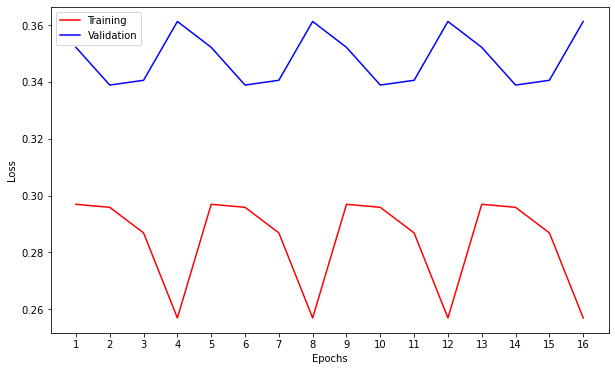

In [83]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

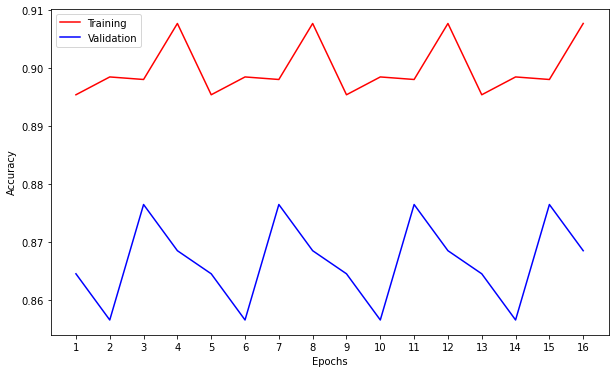

In [84]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


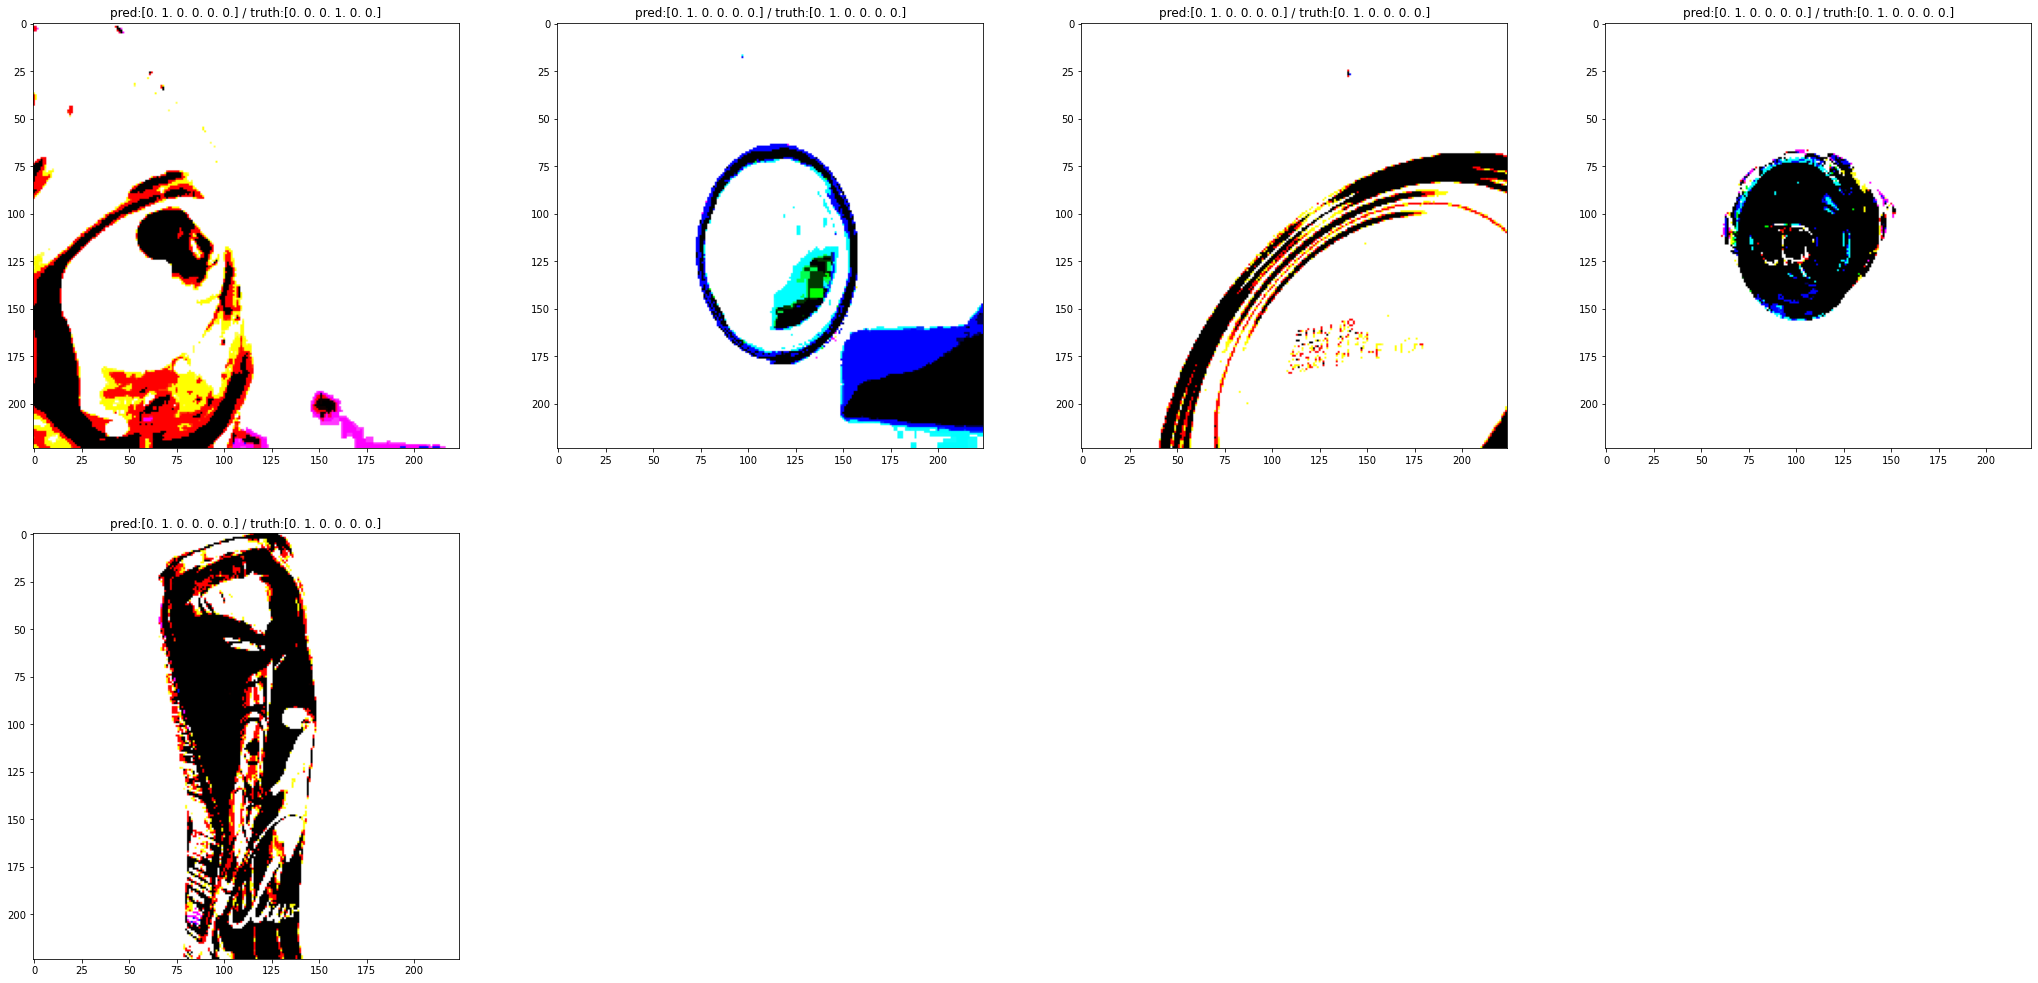

In [85]:
#my addition
# chekcing for prediction
test_x, test_y = valid_batches.__getitem__(1)
preds = model.predict(test_x)
plt.figure(figsize=(36, 36))
for i in range(5):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])